## Plotting train vs val

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os 


In [2]:
def getDataframes(model_name): 
    val_filename = '/home/ubuntu/surgery-tool-detection/logs/{}/{}_validation.csv'.format(model_name, model_name) 
    val_df = pd.read_csv(val_filename) 
    train_filename = '/home/ubuntu/surgery-tool-detection/logs/{}/{}_train.csv'.format(model_name, model_name)
    train_df = pd.read_csv(train_filename) 
    return val_df, train_df 

    Epoch     bovie   scalpel   forceps  needledriver   Overall
0       0  0.125287  0.000000  0.026350      0.118808  0.067611
1       1  0.282521  0.000687  0.016759      0.141994  0.110490
2       2  0.251278  0.001894  0.051950      0.181925  0.121762
3       3  0.289055  0.001242  0.028894      0.333633  0.163206
4       4  0.352814  0.016626  0.093979      0.299302  0.190680
5       5  0.406371  0.008139  0.072089      0.369912  0.214128
6       6  0.378334  0.078564  0.026776      0.356416  0.210023
7       7  0.448017  0.013112  0.055406      0.414960  0.232874
8       8  0.436740  0.086788  0.022073      0.401476  0.236769
9       9  0.437758  0.025673  0.104637      0.367248  0.233829
10     10  0.452724  0.077700  0.124683      0.416108  0.267804
11     11  0.447570  0.073743  0.029213      0.417235  0.241940
12     12  0.369779  0.011873  0.123579      0.348243  0.213368
13     13  0.457991  0.014039  0.117910      0.475295  0.266309
14     14  0.488857  0.078369  0.156265 

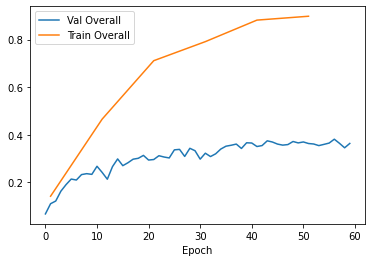

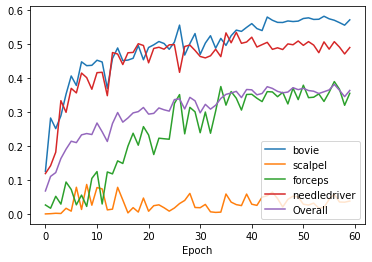

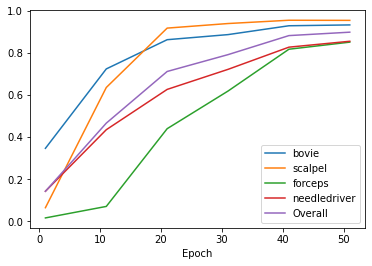

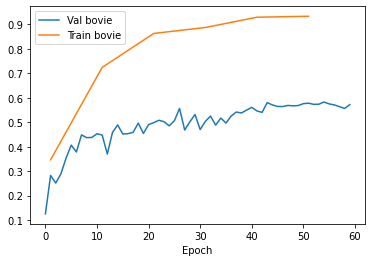

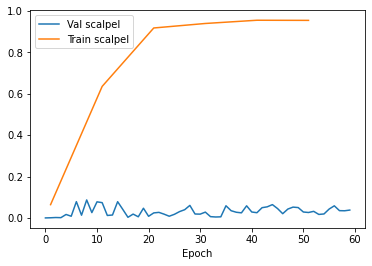

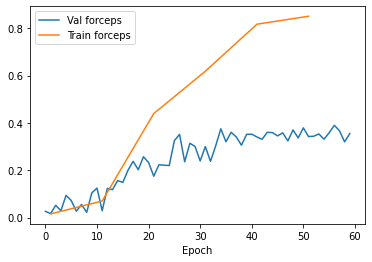

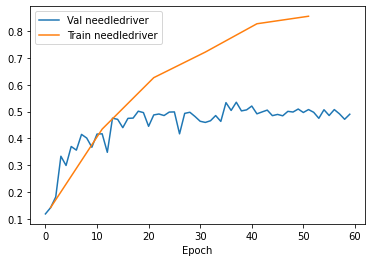

In [3]:
model_name = '9.2_Model4' 

val_df, train_df = getDataframes(model_name) 

print(val_df) 
print(train_df) 

ax = val_df.plot('Epoch', 'Overall', label='Val Overall') 
train_df.plot('Epoch', 'Overall', ax=ax, label='Train Overall')  
val_df.plot('Epoch') 
train_df.plot('Epoch') 

fields = ['Overall', 'bovie', 'scalpel', 'forceps', 'needledriver'] 
for field in fields: 
    if field == "Overall": continue 
    ax = val_df.plot('Epoch', field, label='Val {}'.format(field)) 
    train_df.plot('Epoch', field, ax=ax, label='Train {}'.format(field)) 
    



## Plotting loss curves

In [4]:
def getReducedLossDataframe(model_name): 
    loss_filename = '/home/ubuntu/surgery-tool-detection/logs/{}/{}_loss.csv'.format(model_name, model_name)
    loss_df = pd.read_csv(loss_filename)
    
    loss_dict = []
    for index, row in loss_df.iterrows():
        import math # 
        if math.isnan(row['Epoch']): continue # 
        epoch = int(row['Epoch'])
        if epoch > len(loss_dict):
            loss_dict.append(list(row))

    # Only takes the last iteration value for each epoch
    reduced_loss_df = pd.DataFrame(loss_dict, columns=['Epoch', 'Iteration', 'Classification Loss', 'Regression Loss', 'Running Loss'])
    return reduced_loss_df 


<AxesSubplot:xlabel='Epoch'>

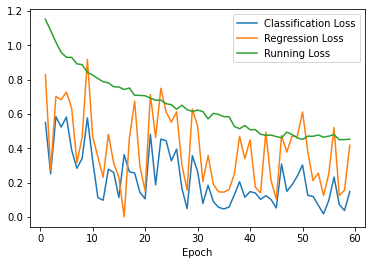

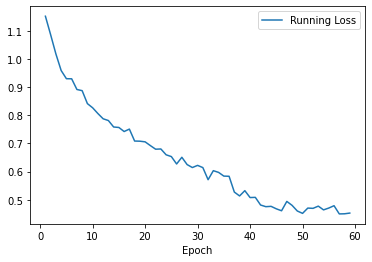

In [5]:
model_name = '9.2_Model4' 
reduced_loss_df = getReducedLossDataframe(model_name) 

reduced_loss_df.plot('Epoch', y=['Classification Loss', 'Regression Loss', 'Running Loss']) 

reduced_loss_df.plot('Epoch', y=['Running Loss']) 

## Comparing 2 models to each other

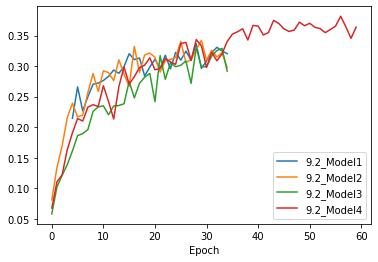

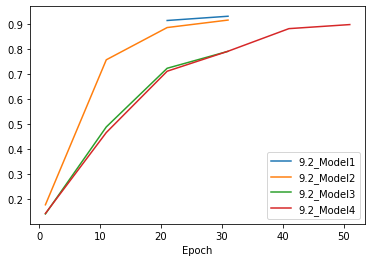

In [9]:
models = ['9.2_Model1', '9.2_Model2', '9.2_Model3', 
          '9.2_Model4'] 
#['8.23_Model2', '8.23_Model3', '8.25_Model1', '8.26_Model1', '9.2_Model1', '9.2_Model2', '9.2_Model3', 
#          '9.2_Model4'] 

val = {} 
train = {} 
for model in models: 
    val[model], train[model] = getDataframes(model) 


fig, ax = plt.subplots() 
for model in models: 
    val[model].plot('Epoch', 'Overall', ax=ax, label=model) 
    
    
fig2, ax2 = plt.subplots() 
for model in models: 
    train[model].plot('Epoch', 'Overall', ax=ax2, label=model)

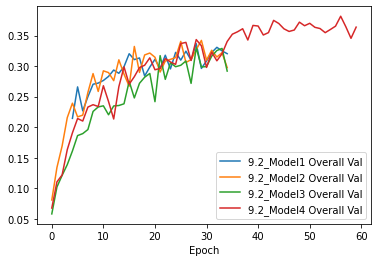

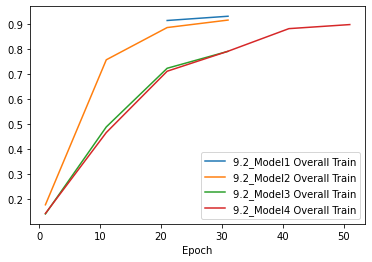

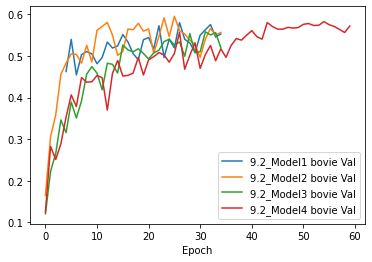

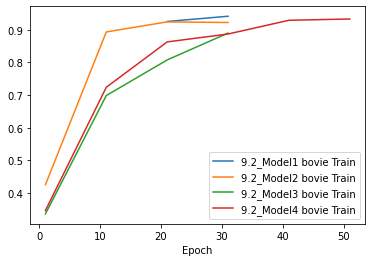

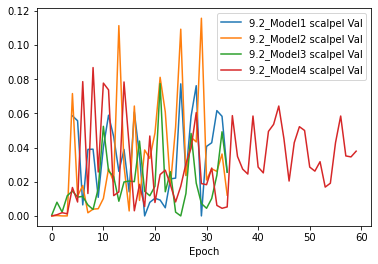

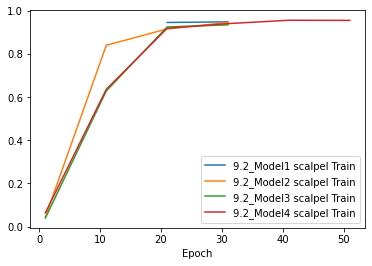

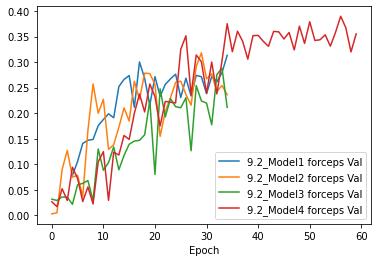

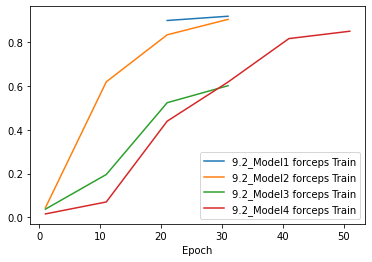

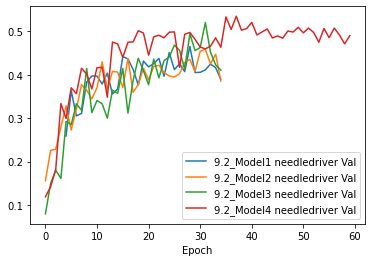

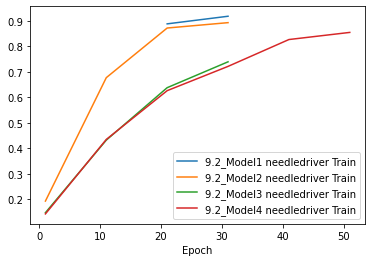

In [10]:
fields = ['Overall', 'bovie', 'scalpel', 'forceps', 'needledriver'] 

for field in fields: 
    fig, ax = plt.subplots() 
    fig2, ax2 = plt.subplots() 
    for model in models: 
        val[model].plot('Epoch', field, ax=ax, label='{} {} Val'.format(model, field)) 
        train[model].plot('Epoch', field, ax=ax2, label='{} {} Train'.format(model, field))
    
    
 

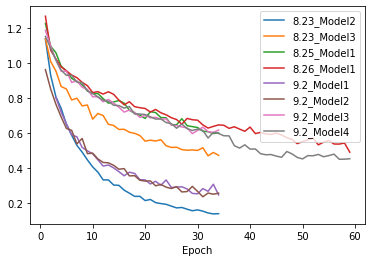

In [8]:

loss = {} 
for model in models: 
    loss[model] = getReducedLossDataframe(model) 
    

fig, ax = plt.subplots() 
for model in models: 
    loss[model].plot('Epoch', 'Running Loss', ax=ax, label=model) 
    
    
